<h4>Lab No 4</h4>
<h4 align="right">Utkarsh Bhangale<br>2020802124</h4>


In [2]:
# Dealing with Outliers
# Importiung libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Generating 200 samples having mean of 60 and std_dev of 12
def generate_scores(mean = 60,std_dev = 12,num_samples = 200):
    scores = np.random.normal(loc=mean,scale = std_dev,size = num_samples)
    scores = np.round(scores)
    return scores
data = generate_scores()

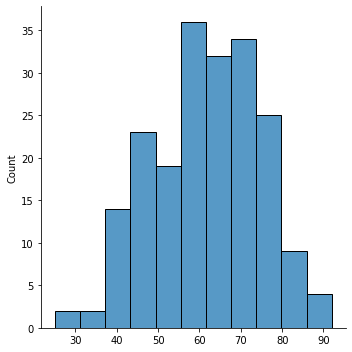

In [5]:
sns.displot(data)

In [7]:
df = pd.DataFrame(data,columns = ['scores'])

Removing Outliers using Standard Deviation Method

In [8]:
df.mean()

scores    61.665
dtype: float64

In [10]:
df.std()

scores    12.971665
dtype: float64

In [13]:
#lowerlimit and upperlimit
lower_limit_std = df.mean() - 3*df.std()
upper_limit_std = df.mean() + 3*df.std()
print(lower_limit_std)
print(upper_limit_std)

scores    22.750005
dtype: float64
scores    100.579995
dtype: float64


In [16]:
# Filtering values using lower and upper limit
df_std = df[(df[['scores']]>=lower_limit_std)& (df[['scores']]<=upper_limit_std)]
df_std

,scores
0,72.0
1,62.0
2,83.0
3,66.0
4,68.0
...,...
195,61.0
196,62.0
197,60.0
198,56.0


Removing Outliers Using Z-score Method

In [30]:
df_Zscore=df['z_score'] = ((df['scores']) - (df['scores']).mean()) / df['scores'].std()
df_Zscore.head()

0    0.796737
1    0.025826
2    1.644739
3    0.334190
4    0.488372
Name: scores, dtype: float64

In [31]:
df_zscore = df[(df['z_score']>-3)&(df['z_score']<3)]
df_zscore.head()

,scores,z_score
0,72.0,0.796737
1,62.0,0.025826
2,83.0,1.644739
3,66.0,0.334190
4,68.0,0.488372


Removing Outliers using Inter-Quartile Range Method

<Axes: >

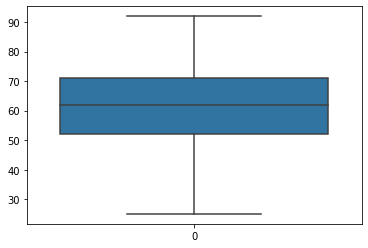

In [32]:
sns.boxplot(data)

In [34]:
df.describe()

,scores,z_score
count,200.000000,2.000000e+02
mean,61.665000,7.105427e-17
std,12.971665,1.000000e+00
min,25.000000,-2.826545e+00
25%,52.000000,-7.450855e-01
50%,62.000000,2.582552e-02
75%,71.000000,7.196455e-01
max,92.000000,2.338559e+00


In [35]:
#Finding quartile using IRQ method
IQR = 71 - 52
lower_limit = 54 - 1.5*IQR
upper_limit = 54 + 1.5*IQR
print(lower_limit)
print(upper_limit)

25.5
82.5


In [41]:
df_IQR = df[(df['scores']>lower_limit)&(df['scores']<upper_limit)]
df_IQR.head()

,scores,z_score
0,72.0,0.796737
1,62.0,0.025826
3,66.0,0.334190
4,68.0,0.488372
5,71.0,0.719645


Removing Outliers using Percentile Method

In [42]:
# Finding lower and upper limit using percentile
lowerlimit,upperlimit = np.percentile(a=df,q=[0.5,99.5])
print(lowerlimit)
print(upperlimit)

-2.1346527053885302
89.00999999999999


In [43]:
df_percentile = df[(df['scores']>lowerlimit)&(df['scores']<upperlimit)]
df_percentile.head()

,scores,z_score
0,72.0,0.796737
1,62.0,0.025826
2,83.0,1.644739
3,66.0,0.334190
4,68.0,0.488372
